In [479]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [480]:
test = pd.read_csv('C:/Users/user/github/Data/aifactory/test_data.csv')
train = pd.read_csv('C:/Users/user/github/Data/aifactory/train_data.csv')

In [481]:
test.drop('out_pressure',axis=1, inplace=True)
train.drop('out_pressure',axis=1, inplace=True)

In [482]:
te = test.drop(['type'], axis=1)
tr = train.drop(['type'], axis= 1)

In [483]:
ss = StandardScaler()

In [484]:
ss.fit(tr)

StandardScaler()

In [485]:
train_sc = ss.transform(tr)

In [486]:
from sklearn.cluster import DBSCAN

In [487]:
epsilon = 0.3
min_samples = 10
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples).fit(train_sc)

In [488]:
labels = dbscan.fit_predict(train_sc)

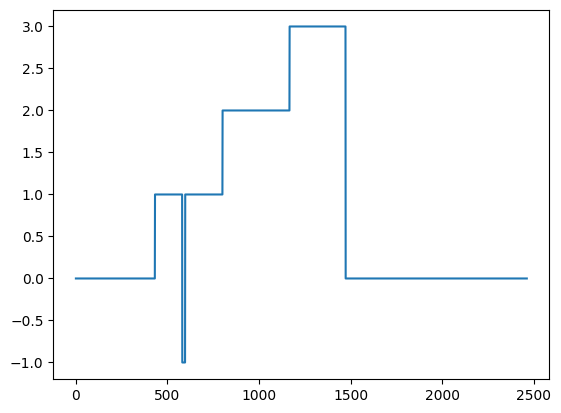

In [489]:
plt.plot(labels)

In [490]:
train_sc = pd.DataFrame(train_sc)

In [491]:
train_sc['label'] = labels

In [492]:
delete = np.where(train_sc['label']== -1)

In [493]:
train_real = train.drop(delete[0], axis=0)

In [494]:
train_real

,air_inflow,air_end_temp,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,24.65,2017.0,62.41,3.12,0
...,...,...,...,...,...,...,...
2458,2.28,50.20,29.53,2416.0,66.84,3.34,7
2459,2.04,46.94,26.34,2155.0,63.94,3.20,7
2460,1.19,35.74,15.39,1259.0,53.99,2.70,7
2461,1.21,36.00,15.64,1280.0,54.22,2.71,7


In [495]:
tr = train_real.drop(['type'], axis= 1)

In [496]:
sc = StandardScaler()

In [497]:
sc.fit(tr)

StandardScaler()

In [498]:
tr_sc = ss.fit_transform(tr)

In [499]:
te_sc = sc.fit_transform(te)

In [500]:
tr_sc = pd.DataFrame(tr_sc)

In [501]:
te_sc = pd.DataFrame(te_sc)

In [502]:
tr_sc

,0,1,2,3,4,5
0,-0.451541,-0.917260,-0.514570,-1.007673,-0.910371,-0.626443
1,0.694479,1.175766,0.796894,1.115975,1.170323,0.636336
2,-0.185797,-0.426063,-0.206336,-0.509444,-0.422228,-0.333848
3,0.196209,0.265506,0.226660,0.192144,0.264504,0.081945
4,-0.194102,-0.435223,-0.212207,-0.518159,-0.431196,-0.333848
...,...,...,...,...,...,...
2442,0.121469,0.136123,0.145932,0.061414,0.136382,0.004947
2443,-0.077839,-0.237141,-0.088179,-0.317705,-0.235170,-0.210650
2444,-0.783721,-1.519520,-0.891790,-1.619203,-1.509979,-0.980636
2445,-0.767112,-1.489751,-0.873443,-1.588699,-1.480511,-0.965237


---
#### 공분산에는 scale 개념이 있어 공분산을 사용하는 GMM, BGM, CBM에는 scale한 데이터를 사용하지 않음
#### 나머지 데이터는 scale한 데이터 사용하여 fitting

#### tr과 te // tr_sc와 te_sc 사용

In [503]:
result = pd.DataFrame(index = test.index ,columns=['gm','bgm','LOF','autoencoder','svm','gan' ,'CBM'], data=0)

In [504]:
from sklearn.mixture import GaussianMixture

# GMM: n_components = 모델의 총 수
gm = GaussianMixture(n_components=4, covariance_type = 'full',n_init=30, random_state=42)
gm.fit(tr)

GaussianMixture(n_components=4, n_init=30, random_state=42)

In [505]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=4, n_init=15, random_state=42)
bgm.fit(tr)

BayesianGaussianMixture(n_components=4, n_init=15, random_state=42)

In [506]:
print(gm.converged_)
print(bgm.converged_)

True
True


In [507]:
densities = gm.score_samples(te)
density_threshold = np.percentile(densities, 7)

bgm_densities = bgm.score_samples(te)
bgm_density_threshold = np.percentile(bgm_densities, 7)

Text(0.5, 1.0, 'gmm result')

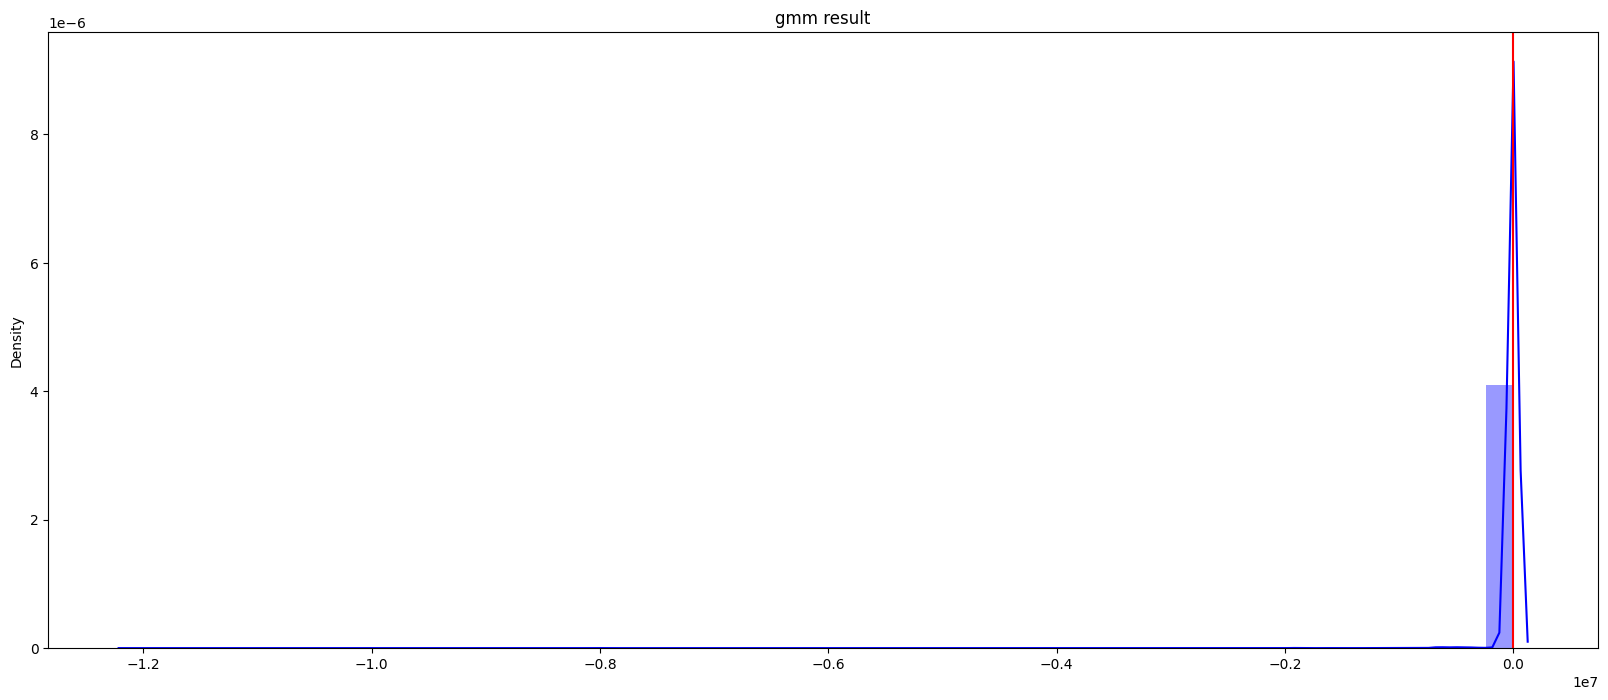

In [508]:
plt.figure(figsize=(20,8))
sns.distplot(densities, kde=True, color="b")
plt.axvline(density_threshold, color = 'red')
plt.title('gmm result')

Text(0.5, 1.0, 'bgm result')

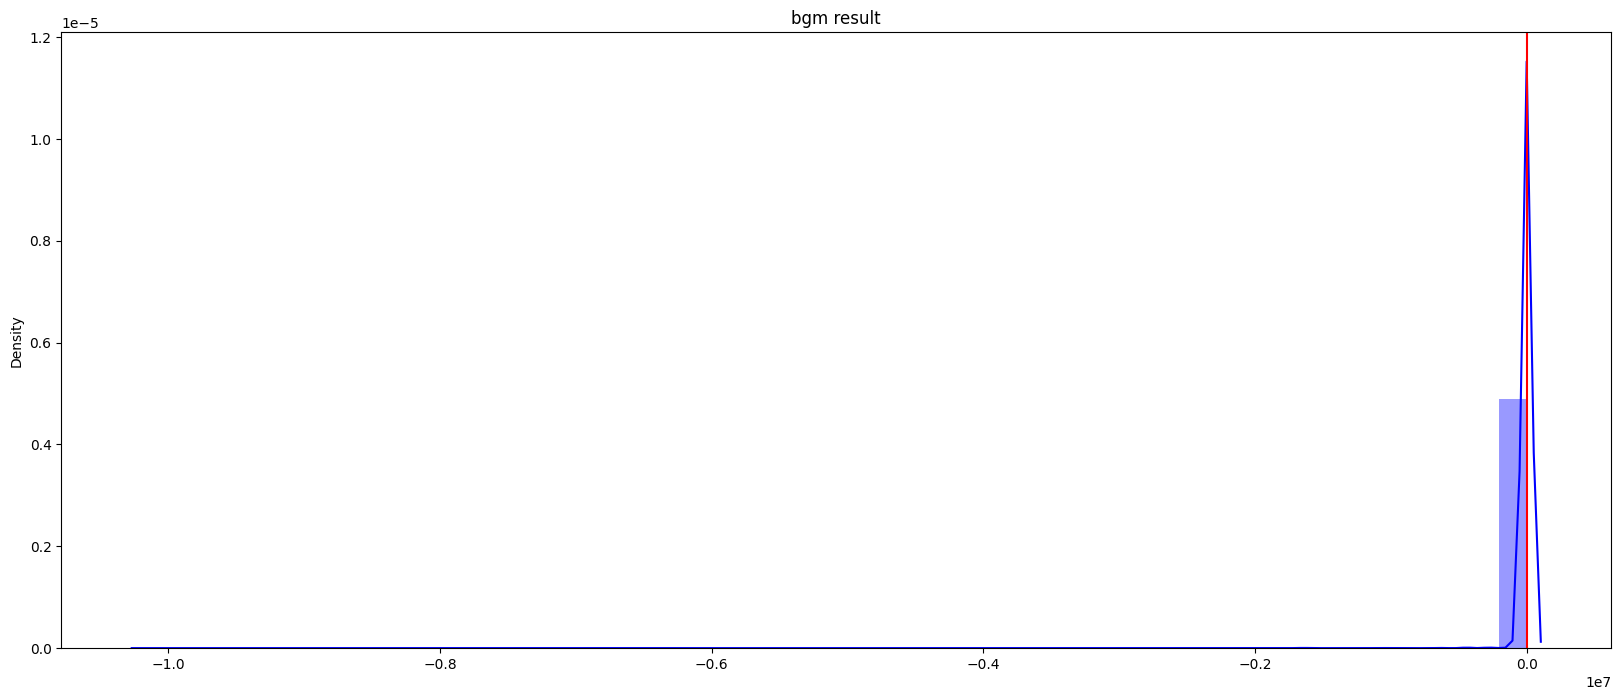

In [509]:
plt.figure(figsize=(20,8))
sns.distplot(bgm_densities, kde=True, color="b")
plt.axvline(bgm_density_threshold, color = 'red')
plt.title('bgm result')

(-10.0, 50.0)

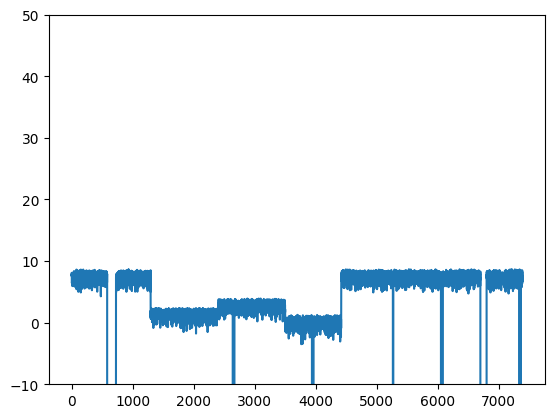

In [586]:
plt.plot(bgm_densities)
plt.ylim(-10,50)

(-10.0, 50.0)

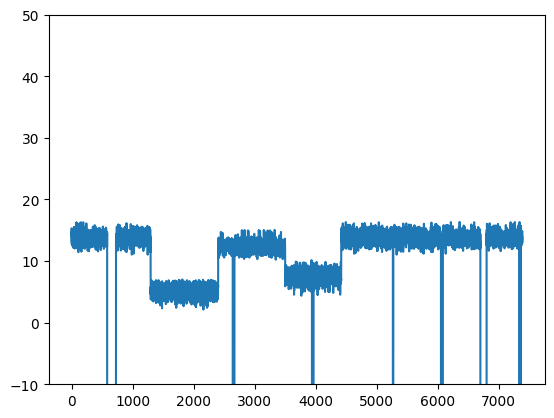

In [584]:
plt.plot(densities)
plt.ylim(-10,50)

In [510]:
anomalies = te[densities < density_threshold]

bgm_anomalies = te[bgm_densities < bgm_density_threshold]

In [511]:
result.loc[anomalies.index.tolist(), 'gm'] = 1
result.loc[bgm_anomalies.index.tolist(), 'bgm'] = 1

---
## LOF

In [512]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV

In [513]:
clf = LocalOutlierFactor()

In [514]:
param_grid = {'n_neighbors' : [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], 'contamination' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],}

In [515]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid,
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=2
                          )

In [516]:
grid_search.fit(tr_sc)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=LocalOutlierFactor(), n_jobs=-1,
             param_grid={'contamination': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28]},
             scoring='accuracy', verbose=2)

In [517]:
best_param = grid_search.best_params_

In [518]:
best_param

{'contamination': 0.1, 'n_neighbors': 5}

In [519]:
clf2 = LocalOutlierFactor(**best_param)

In [520]:
clf2.fit(tr_sc)

LocalOutlierFactor(contamination=0.1, n_neighbors=5)

#### LOF 비지도학습 알고리즘이라 학습할 필요없이 그냥 바로 fit_predict 해도 될듯?

In [521]:
clf2.fit_predict(te_sc)

array([-1,  1,  1, ...,  1,  1,  1])

In [522]:
lof_score = clf2.negative_outlier_factor_

In [523]:
lof_threshold = np.percentile(lof_score, 5)

(-15.0, 0.0)

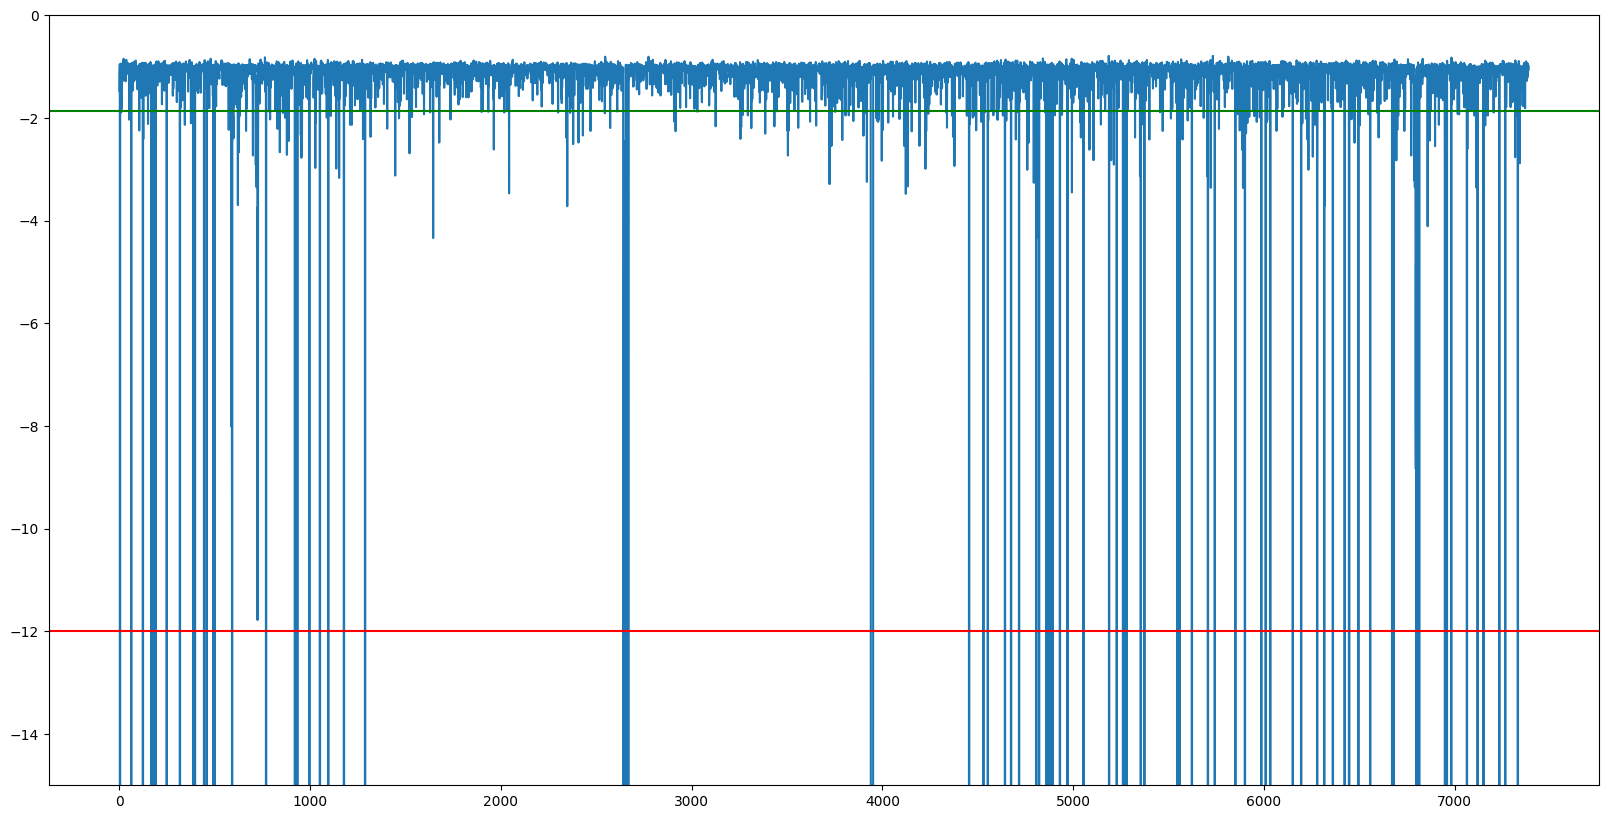

In [598]:
plt.figure(figsize=(20,10))
plt.plot(lof_score)
plt.axhline(-12, color = 'r')
plt.axhline(lof_threshold,  color = 'g')
plt.ylim(-15,0)

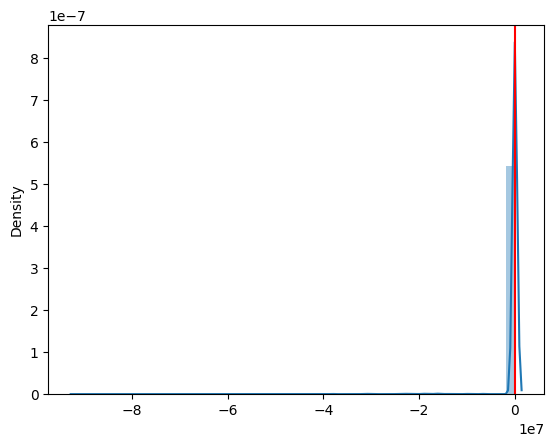

In [524]:
sns.distplot(lof_score)
plt.axvline(lof_threshold, color = 'r')
plt.show()

In [525]:
result.loc[np.where(lof_score<lof_threshold)[0], 'LOF'] = 1

---

## AutoEncoder

In [526]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [527]:
input_dim = tr_sc.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(32, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='relu')(encoder)

autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer='adam', loss='mse')

In [528]:
autoencoder.fit(tr_sc, tr_sc, epochs=500, batch_size=100, shuffle=True)

Epoch 1/500
25/25 [==============================] - 0s 833us/step - loss: 0.8240
Epoch 2/500
25/25 [==============================] - 0s 875us/step - loss: 0.6908
Epoch 3/500
25/25 [==============================] - 0s 917us/step - loss: 0.5860
Epoch 4/500
25/25 [==============================] - 0s 750us/step - loss: 0.5450
Epoch 5/500
25/25 [==============================] - 0s 708us/step - loss: 0.5356
Epoch 6/500
25/25 [==============================] - 0s 762us/step - loss: 0.5326
Epoch 7/500
25/25 [==============================] - 0s 708us/step - loss: 0.5310
Epoch 8/500
25/25 [==============================] - 0s 667us/step - loss: 0.5301
Epoch 9/500
25/25 [==============================] - 0s 665us/step - loss: 0.5294
Epoch 10/500
25/25 [==============================] - 0s 667us/step - loss: 0.5288
Epoch 11/500
25/25 [==============================] - 0s 792us/step - loss: 0.5284
Epoch 12/500
25/25 [==============================] - 0s 708us/step - loss: 0.5281
Epoch 13/500


In [529]:
x_pred = autoencoder.predict(te_sc)
mse = np.mean(np.power(te_sc - x_pred, 2), axis=1)

231/231 [==============================] - 0s 545us/step


In [530]:
# 이상치 검출
auto_threshold = np.mean(mse) + 3*np.std(mse)
auto_outliers = np.where(mse > auto_threshold)[0]

<AxesSubplot: >

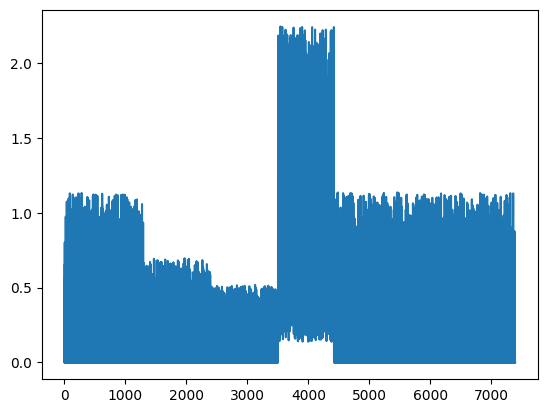

In [603]:
pd.DataFrame(x_pred).mean(axis=1).plot()

In [531]:
auto_threshold

2.3685828237619906

In [532]:
auto_outliers

array([1311, 1449, 1454, 1551, 1750, 1868, 2136, 2138, 2186, 2205, 2261,
       2406, 2413, 2416, 2418, 2420, 2425, 2428, 2429, 2430, 2434, 2435,
       2454, 2455, 2457, 2464, 2468, 2478, 2479, 2488, 2492, 2500, 2504,
       2509, 2510, 2512, 2517, 2518, 2524, 2529, 2536, 2541, 2552, 2560,
       2565, 2573, 2575, 2582, 2594, 2608, 2612, 2619, 2622, 2624, 2637,
       2647, 2668, 2683, 2688, 2691, 2697, 2699, 2701, 2715, 2716, 2721,
       2724, 2726, 2735, 2736, 2739, 2745, 2750, 2753, 2758, 2764, 2768,
       2772, 2773, 2776, 2781, 2782, 2793, 2797, 2801, 2802, 2805, 2806,
       2810, 2813, 2816, 2817, 2825, 2834, 2836, 2844, 2847, 2853, 2862,
       2864, 2869, 2873, 2874, 2879, 2887, 2888, 2889, 2895, 2903, 2913,
       2915, 2918, 2935, 2940, 2941, 2946, 2972, 2978, 2980, 2986, 2987,
       2998, 3007, 3039, 3081, 3086, 3088, 3094, 3100, 3109, 3110, 3112,
       3137, 3142, 3143, 3154, 3155, 3168, 3170, 3182, 3185, 3198, 3201,
       3211, 3225, 3258, 3269, 3282, 3293, 3299, 33

In [533]:
result.loc[auto_outliers, 'autoencoder'] = 1

---
## CBM

In [534]:
def hotellings_tsquare(trdat, tedat):
    '''
    Hotellings T-square : 공분산을 반영한 유클리디안 거리 (마할라노비스 거리)
    
    @param trdat : train data
    @param tedat : test data
    '''
    obs = trdat.shape[0]
    dim = trdat.shape[1]
    
    mu = trdat.apply(np.mean, axis=0) # 열단위 평균계산
    sinv = np.linalg.pinv(trdat.cov()) # 공분산 역행렬

    dte = (tedat-mu).values 
    
    Tsq_mat = np.zeros(tedat.shape[0])
    for i in range(tedat.shape[0]):
        Tsq_mat[i] = dte[i,:] @ sinv @ dte[i,:].transpose() # t-square distance
        
    return Tsq_mat

def bootstrap_limit(stat, alpha=0.05, bootstrap=300):
    '''
    Bootstrap sampling을 활용한 Control Limit 산출 기법
    
    @param stat : 통계량
    @param alpha : Control Limit을 정하기 위한 유의수준
    @param : bootstrap : 샘플링 횟수
    '''
    alpha = (alpha/2)*100
    alpha = 100 - alpha
    samsize = max(10000, len(stat))
    limit = np.mean(list(map(lambda x:np.percentile(np.random.choice(stat,samsize,replace=True),alpha), range(0,bootstrap))))
    # stat에서 samsize만큼 선택 후 75%분위수(alpha에따라 변경) 뽑기 이후 bootstrap만큼 반복 후 리스트로 만들고 평균 계산
    return limit

In [535]:
hotell_result = []
for i in range(4):
    data = train_sc[train_sc['label'] == i]
    hotell_result.append(hotellings_tsquare(data,train_sc))

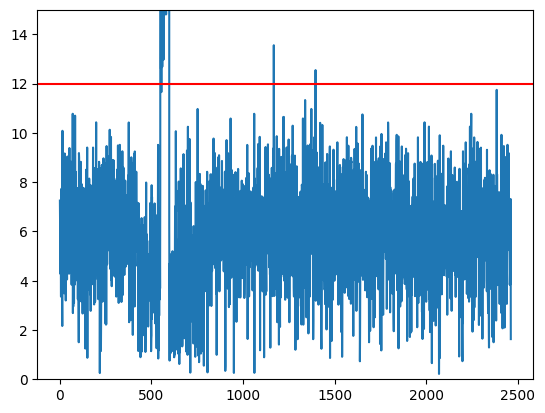

In [536]:
pd.DataFrame(hotell_result).T.min(axis=1).plot()
plt.ylim(0,15)
plt.axhline(12,color='r')
plt.show()

In [537]:
drop_index = np.where(pd.DataFrame(hotell_result).T.min(axis=1) < 12)

In [538]:
real_tr = tr.loc[drop_index]

In [539]:
real_label = pd.DataFrame(labels).loc[drop_index]

In [540]:
real_tr['label'] = real_label

In [541]:
hotell_result = []
for i in range(4):
    data = real_tr[real_tr['label'] == i]
    drop_data = data.drop(['label'], axis=1)
    hotell_result.append(hotellings_tsquare(drop_data,real_tr.drop('label',axis=1)))

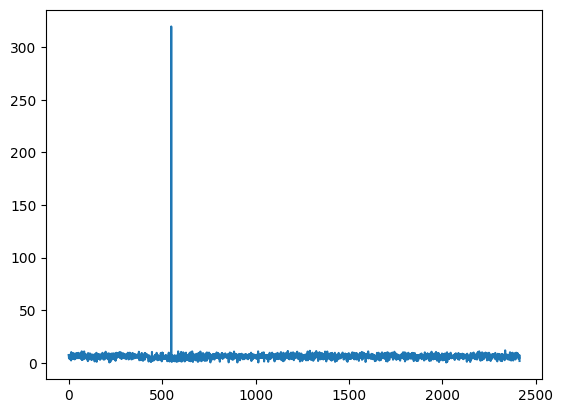

In [542]:
pd.DataFrame(hotell_result).T.min(axis=1).plot()
plt.show()

In [543]:
hotell_result_te = []
for i in range(4):
    data = real_tr[real_tr['label'] == i]
    drop_data = data.drop('label', axis=1)
    hotell_result_te.append(hotellings_tsquare(drop_data,test.drop('type', axis=1)))

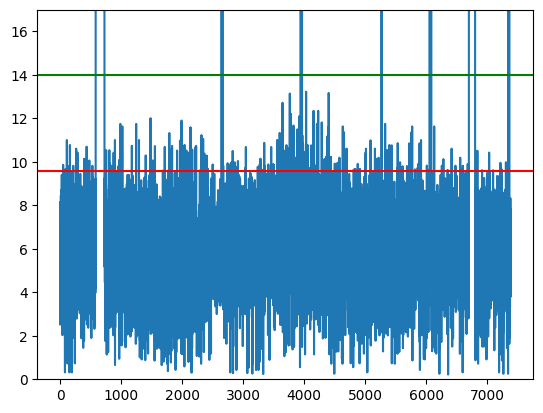

In [544]:
pd.DataFrame(hotell_result_te).T.min(axis=1).plot()
plt.axhline(bootstrap_limit(pd.DataFrame(hotell_result).T.min(axis=1)), color ='r')
plt.axhline(14, color='green')
plt.ylim(0,17)
plt.show()

In [545]:
total_result = pd.DataFrame(hotell_result_te).T.min(axis=1)

In [546]:
control_limit = np.where(total_result >14)[0]

In [547]:
result.loc[control_limit, 'CBM'] = 1

---
### SVM

In [548]:
from sklearn.svm import OneClassSVM

In [549]:
model = OneClassSVM()

In [550]:
param_grid = {
    'kernel': ['rbf','poly'],
    'nu': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'gamma' : [0.3, 0.5, 0.7, 1, 'scale', 'auto']
}

In [551]:
grid_search = GridSearchCV(model, param_grid, scoring='f1_weighted', cv=5)

In [552]:
grid_search.fit(tr_sc)

GridSearchCV(cv=5, estimator=OneClassSVM(),
             param_grid={'gamma': [0.3, 0.5, 0.7, 1, 'scale', 'auto'],
                         'kernel': ['rbf', 'poly'],
                         'nu': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             scoring='f1_weighted')

In [553]:
best_params = grid_search.best_params_
print(f'Best Parmas:{best_params}')

Best Parmas:{'gamma': 0.3, 'kernel': 'rbf', 'nu': 0.4}


In [554]:
svm_fit = OneClassSVM(**best_params)
svm_fit.fit(tr_sc)

OneClassSVM(gamma=0.3, nu=0.4)

In [555]:
svm_prediction = svm_fit.predict(te_sc)

In [556]:
svm_prediction = pd.DataFrame(svm_prediction).replace(1,0).replace(-1,1)

In [557]:
svm_prediction.columns = ['label']

In [558]:
svm_score = svm_fit.score_samples(te_sc)

(150.0, 180.0)

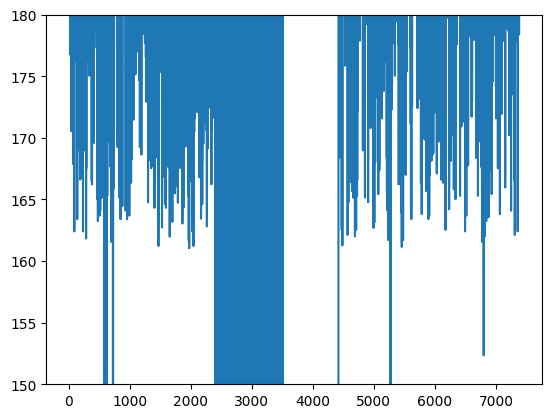

In [606]:
plt.plot(svm_score)
plt.ylim(150,180)

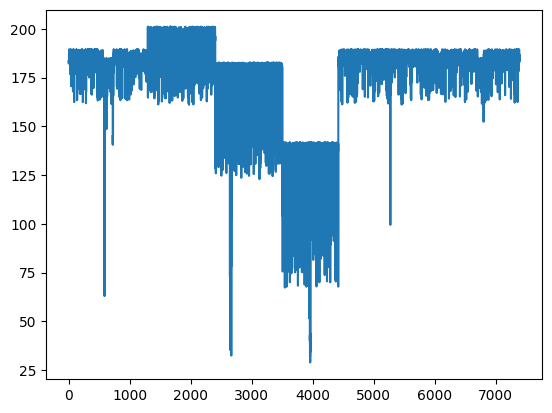

In [607]:
plt.plot(svm_score)

In [559]:
threshold = np.percentile(svm_score,5)

In [560]:
svm_index = np.where(svm_score < threshold)

In [561]:
result.loc[svm_index[0], 'svm'] = 1

---
### GANoamly

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Define hyperparameters
latent_dim = 32
epochs = 50
batch_size = 64

# Define the generator
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, input_shape=(latent_dim,), activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(6, activation='tanh'))
    return model

# Define the discriminator
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(512, input_shape=(6,), activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))
    return model

# Define the GAN model
def make_gan_model(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential([generator, discriminator])
    return model


# Initialize the generator, discriminator, and GAN models
generator = make_generator_model()
discriminator = make_discriminator_model()
gan = make_gan_model(generator, discriminator)

# Compile the models
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
generator.compile(loss='mse', optimizer=generator_optimizer)
discriminator.compile(loss='mse', optimizer=discriminator_optimizer)
gan.compile(loss='mse', optimizer=generator_optimizer)


tr_va = tr_sc.values

te_va = te_sc.values

# Train the models
for epoch in range(epochs):
    for i in range(tr_va.shape[0] // batch_size):
        # Generate noise
        noise = tf.random.normal([batch_size, latent_dim])
        
        # Generate fake data
        fake_data = generator(noise)
        
        # Concatenate real and fake data
        real_and_fake_data = tf.concat([tr_va[i * batch_size:(i + 1) * batch_size, :], fake_data], axis=0)
        
        # Generate labels
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
        
        # Train the discriminator
        discriminator.trainable = True
        discriminator_loss = discriminator.train_on_batch(real_and_fake_data, labels)
        
        # Generate new noise
        noise = tf.random.normal([batch_size, latent_dim])
        
        # Generate new labels
        labels = tf.ones((batch_size, 1))
        
        # Train the generator
        discriminator.trainable = False
        generator_loss = gan.train_on_batch(noise, labels)
    
    # Print the losses
    print('Epoch %d: generator_loss=%.4f, discriminator_loss=%.4f' % (epoch + 1, generator_loss, discriminator_loss))

# # Generate test data
# test_noise = tf.random.normal([te_va.shape[0], latent_dim])
generated_data = generator.predict(te_va)

mse = np.mean(np.power(te_va - generated_data, 2), axis=1)

gan_threshold = np.percentile(mse, 95)

gan_y_pred = (mse > gan_threshold).astype(int)

print('Number of anomalies detected:', np.sum(gan_y_pred))

plt.plot(gan_y_pred)

result['gan'] = gan_y_pred

---

### 최종결과

In [562]:
result['label'] = 0

In [563]:
result

,gm,bgm,LOF,autoencoder,svm,gan,CBM,label
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7384,0,0,0,0,0,0,0,0
7385,0,0,0,0,0,0,0,0
7386,0,0,0,0,0,0,0,0
7387,0,0,0,0,0,0,0,0


In [564]:
print(result.gm.value_counts())
print('---')
print(result.bgm.value_counts())
print('---')
print(result.LOF.value_counts())
print('---')
print(result.autoencoder.value_counts())
print('---')
print(result.svm.value_counts())
print('---')
print(result.gan.value_counts())
print('---')
print(result.CBM.value_counts())

0    6871
1     518
Name: gm, dtype: int64
---
0    6871
1     518
Name: bgm, dtype: int64
---
0    7019
1     370
Name: LOF, dtype: int64
---
0    7221
1     168
Name: autoencoder, dtype: int64
---
0    7019
1     370
Name: svm, dtype: int64
---
0    7389
Name: gan, dtype: int64
---
0    7052
1     337
Name: CBM, dtype: int64


<AxesSubplot: >

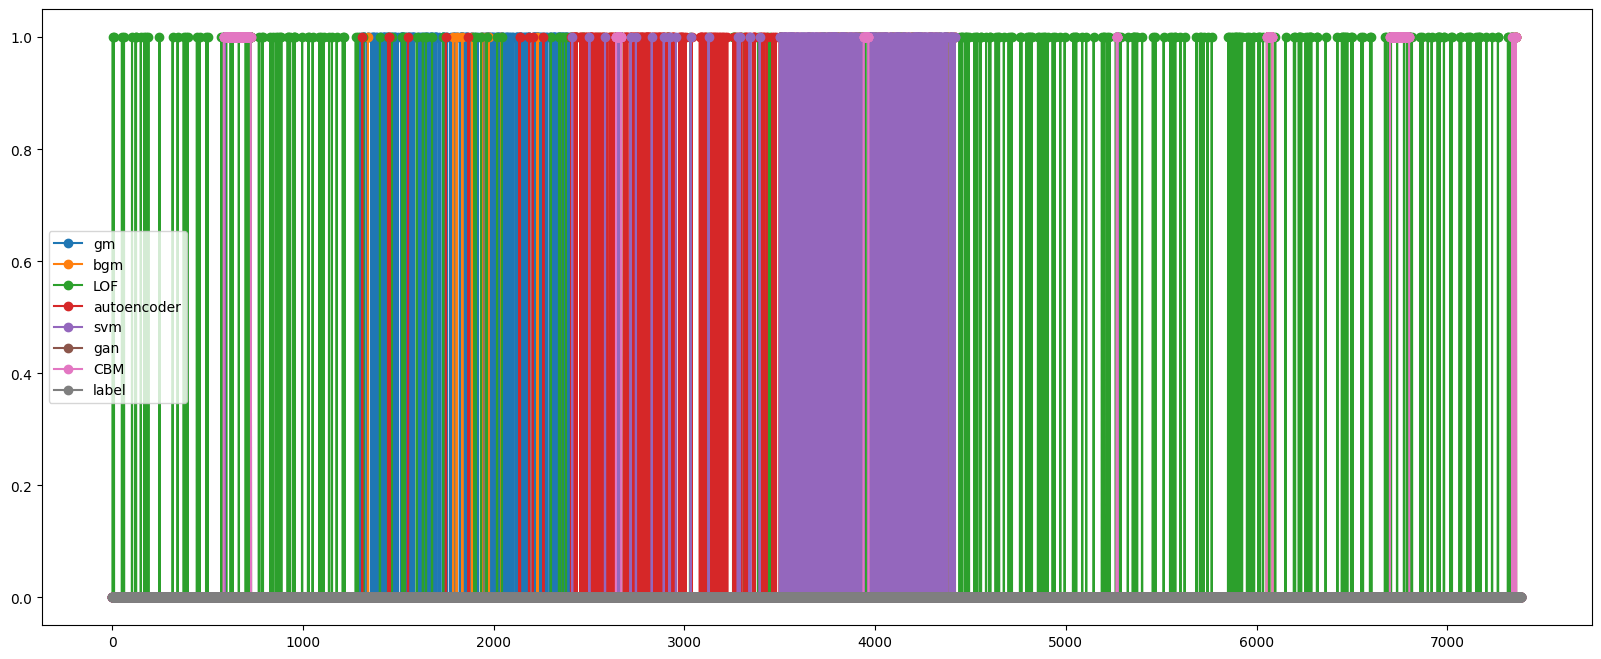

In [565]:
result.plot(figsize=(20,8), marker = "o")

In [566]:
result

,gm,bgm,LOF,autoencoder,svm,gan,CBM,label
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7384,0,0,0,0,0,0,0,0
7385,0,0,0,0,0,0,0,0
7386,0,0,0,0,0,0,0,0
7387,0,0,0,0,0,0,0,0


In [567]:
for i in range(len(result)):
    if result.iloc[:,6][i] == 1:
        result.label[i] = 1
    elif result.iloc[:,:6].mean(axis=1)[i] >= 0.5:
        result.label[i] = 1
    else:
        pass

<AxesSubplot: >

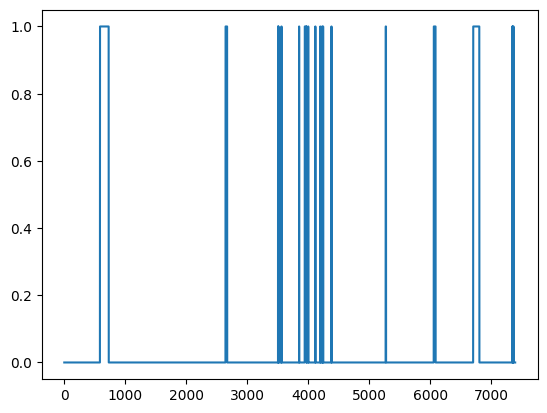

In [568]:
result.label.plot()

In [569]:
result.label.value_counts()

0    7041
1     348
Name: label, dtype: int64

In [570]:
result.label = 0

In [571]:
#result.CBM = result.CBM*2
result.label = result.iloc[:,:7].mean(axis=1)
for i in range(len(result)):
    if result.label[i] >= 0.5:
        result.label[i] = 1
    else:
        result.label[i] = 0

#result.CBM = result.CBM/2

<AxesSubplot: >

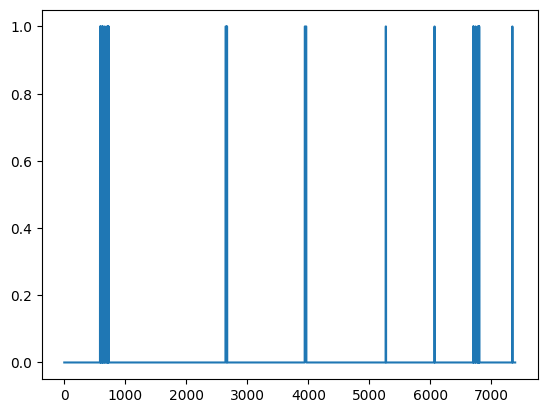

In [572]:
result.label.plot()

In [573]:
result.label.value_counts()

0.0    7292
1.0      97
Name: label, dtype: int64

result.to_csv('C:/Users/user/Desktop/re.csv', index=False)